In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file
data = pd.read_excel("train_test_data.xlsx")

# View the first 5 rows
data.head()

,Unnamed: 0,mw,xlogp,polararea,hbondacc,hbonddonor,rotbonds,heavycnt,Activity
0,0,354.40,2.9,118.0,4,4,11,26,1
1,1,584.70,1.6,127.0,9,3,8,42,0
2,2,181.23,1.7,52.3,2,1,3,13,0
3,3,751.90,2.8,194.0,15,5,7,52,1
4,4,386.80,4.0,47.7,6,0,2,25,0


## Random forest model

In [3]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Replace 'your_feature_columns' with the actual names of your feature columns
X = data[['mw', 'xlogp', 'polararea','hbondacc','hbonddonor','rotbonds','heavycnt']]
# Replace 'your_label_column' with the actual name of your label column
y = data['Activity']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       193
           1       0.89      0.96      0.93       193

    accuracy                           0.92       386
   macro avg       0.93      0.92      0.92       386
weighted avg       0.93      0.92      0.92       386



### Test model

In [ ]:
# Assuming you have a new dataframe 'new_data' with the same features as your training data
# Replace 'your_feature_column_1', 'your_feature_column_2', ... with the actual names of your feature columns
new_X = new_data[['your_feature_column_1', 'your_feature_column_2', ...]]

# Use the trained Random Forest Classifier to make predictions on the new data
new_predictions = rf_classifier.predict(new_X)

# Print the predicted labels for the new data
print("Predicted Labels for New Data:")
print(new_predictions)


## Naive baysian model

In [4]:
# Read the CSV file
data_1 = pd.read_excel("train_test_data.xlsx")

# View the first 5 rows
data_1.head()

,Unnamed: 0,mw,xlogp,polararea,hbondacc,hbonddonor,rotbonds,heavycnt,Activity
0,0,354.40,2.9,118.0,4,4,11,26,1
1,1,584.70,1.6,127.0,9,3,8,42,0
2,2,181.23,1.7,52.3,2,1,3,13,0
3,3,751.90,2.8,194.0,15,5,7,52,1
4,4,386.80,4.0,47.7,6,0,2,25,0


Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       193
           1       0.76      0.91      0.83       193

    accuracy                           0.81       386
   macro avg       0.82      0.81      0.81       386
weighted avg       0.82      0.81      0.81       386



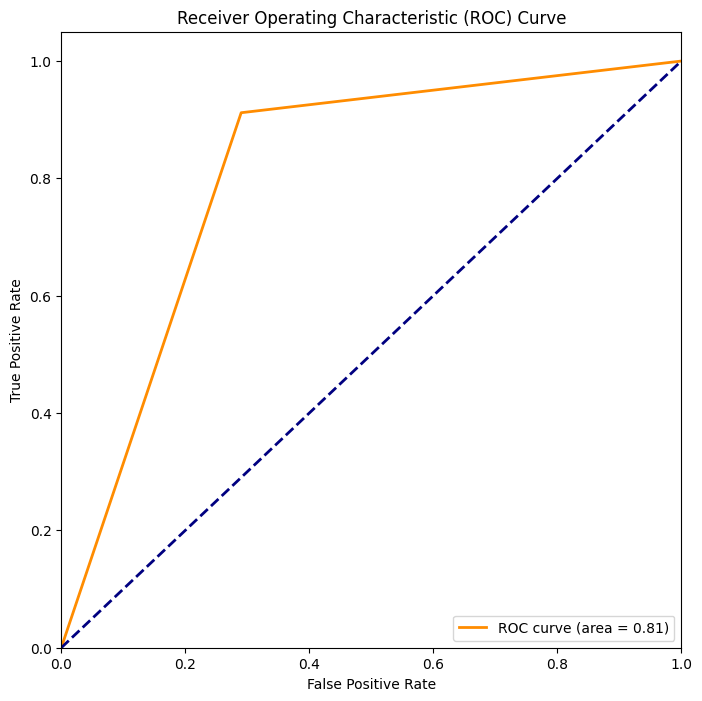

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Assuming 'data_1' is your DataFrame

# Extract features and target variable
X = data_1[['mw', 'xlogp', 'polararea','hbondacc','hbonddonor','rotbonds','heavycnt']]
y = data_1['Activity']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a preprocessing pipeline
preprocessing_pipeline = make_pipeline(
    StandardScaler()  # Standardize the features
)

# Fit and transform the preprocessing pipeline on the training data
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)

# Transform the testing data using the same preprocessing pipeline
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

# Create a Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()

# Train the model on the preprocessed training set
nb_classifier.fit(X_train_preprocessed, y_train)

# Make predictions on the preprocessed testing set
y_pred = nb_classifier.predict(X_test_preprocessed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## SVM model

In [6]:
# Read the CSV file
data_2 = pd.read_excel("train_test_data.xlsx")

# View the first 5 rows
data_2.head()

,Unnamed: 0,mw,xlogp,polararea,hbondacc,hbonddonor,rotbonds,heavycnt,Activity
0,0,354.40,2.9,118.0,4,4,11,26,1
1,1,584.70,1.6,127.0,9,3,8,42,0
2,2,181.23,1.7,52.3,2,1,3,13,0
3,3,751.90,2.8,194.0,15,5,7,52,1
4,4,386.80,4.0,47.7,6,0,2,25,0


In [7]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Replace 'your_feature_columns' with the actual names of your feature columns
X = data_1[['mw', 'xlogp', 'polararea','hbondacc','hbonddonor','rotbonds','heavycnt']]
# Replace 'your_label_column' with the actual name of your label column
y = data_1['Activity']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC()

# Train the model on the training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       193
           1       0.79      0.85      0.82       193

    accuracy                           0.82       386
   macro avg       0.82      0.82      0.82       386
weighted avg       0.82      0.82      0.82       386



### k-fold cross validation svm

In [9]:
# Read the CSV file
data_3 = pd.read_excel("train_test_data.xlsx")

# View the first 5 rows
data_3.head()

,Unnamed: 0,mw,xlogp,polararea,hbondacc,hbonddonor,rotbonds,heavycnt,Activity
0,0,354.40,2.9,118.0,4,4,11,26,1
1,1,584.70,1.6,127.0,9,3,8,42,0
2,2,181.23,1.7,52.3,2,1,3,13,0
3,3,751.90,2.8,194.0,15,5,7,52,1
4,4,386.80,4.0,47.7,6,0,2,25,0


In [11]:
data_3 = data_3.drop('Unnamed: 0', axis=1)
data_3

,mw,xlogp,polararea,hbondacc,hbonddonor,rotbonds,heavycnt,Activity
0,354.40,2.9,118.0,4,4,11,26,1
1,584.70,1.6,127.0,9,3,8,42,0
2,181.23,1.7,52.3,2,1,3,13,0
3,751.90,2.8,194.0,15,5,7,52,1
4,386.80,4.0,47.7,6,0,2,25,0
...,...,...,...,...,...,...,...,...
1923,482.50,-6.2,248.0,14,10,6,33,1
1924,305.40,0.9,70.0,5,2,5,22,0
1925,1664.90,0.6,701.0,31,17,12,114,1
1926,465.60,1.5,138.0,7,3,12,32,0


In [13]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming 'df' is your DataFrame with features and target variable

# Extract features and target variable
X = data_3.drop('Activity', axis=1)  # Replace 'target_column' with the actual name of your target column
y = data_3['Activity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model with a pipeline including standardization
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Perform k-fold cross-validation
k_folds = 10  # You can adjust the number of folds as needed
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=k_folds)

# Print the cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')

# Fit the model on the entire training set
svm_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = svm_model.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


Cross-Validation Scores: [0.84516129 0.85806452 0.81818182 0.83766234 0.7987013  0.87012987
 0.85064935 0.79220779 0.86363636 0.81818182]
Mean CV Score: 0.8352576455802263
Test Accuracy: 0.8549222797927462
